# Problem Set 3: 

### Question 1: 
#### a)

In [1]:
import numpy as np

In [2]:
def f1(x):
    """
    A helper function to return the value of the funtion at x
    """
    return x**4 - 2*x + 1

def midpoint(f, N):
    """
    Perform midpoint integration from
    0 to 2 using N midpoint evaluations
    
    N: The number of time the function is evaluated
    """
    
    edges = np.linspace(0,2,N + 1) # The bin edges for each evaluation
    midpoints = edges[1:] - (edges[1]/2) # The bin midpoints
    f_of_x = f(midpoints) # The value of the function at the midpoint
    h = 2/N # The width of each bin
    return sum(h * f_of_x) # Return the sum of the bin width times the function value for each bin

n10 = midpoint(f1, 10)
print(f"Midpoint rule, N = 10: {n10:0.15f}")

n100 = midpoint(f1, 100)
print(f"Midpoint rule, N = 100: {n100:0.15f}")

n1000 = midpoint(f1, 1000)
print(f"Midpoint rule, N = 1000: {n1000:0.15f}")

Midpoint rule, N = 10: 4.346760000000000
Midpoint rule, N = 100: 4.399466676000000
Midpoint rule, N = 1000: 4.399994666667599


#### b) 

In [3]:
def trap(f, N):
    """
    Perform tapazoidal integration from 0 to 2
    using N + 1 evaluations. 
    """
    edges = np.linspace(0, 2, N + 1) # Define the points where the function is evaluated
    s = 0.5 * f(edges[0]) + 0.5 * f(edges[-1]) # Combine the first two terms in the sum 
    s += sum(f(edges[1:-1])) # Combine the rest of the terms in the sum
    h = 2 / N # Calculate the width of each bin
    return h * s

trap_10 = trap(f1, 10)
print(f"Trapazoidal rule for N = 10: {trap_10:0.15f}")

trap_100 = trap(f1, 100)
print(f"Trapazoidal rule for N = 100: {trap_100:0.15f}")

trap_1000 = trap(f1, 1000)
print(f"Trapazoidal rule for N = 1000: {trap_1000:0.15f}")


Trapazoidal rule for N = 10: 4.506560000000000
Trapazoidal rule for N = 100: 4.401066656000000
Trapazoidal rule for N = 1000: 4.400010666665600


#### c)

In [4]:
vals = [10, 100, 1000]

def simpsons(f, N):
    """
    Use simposons rule to calculate the integral from
    0 to 2 using N evaluations
    """
    edges = np.linspace(0, 2, N + 1) # All the points where the function is evaluated

    h = 2 / N # The width of the bins
    s = f(edges[0]) + f(edges[-1])
    s += 4 * sum(f(edges[1:-1:2]))
    s += 2 * sum(f(edges[2:-1:2]))
    return (1/3) * h * s

for i in vals:
    ap = simpsons(f1, i)
    print(f"Simpsons Rule for N = {i}: {ap:0.15f}")

Simpsons Rule for N = 10: 4.400426666666667
Simpsons Rule for N = 100: 4.400000042666667
Simpsons Rule for N = 1000: 4.400000000004267


#### D)

In [5]:
def error(method, f, N, exact):
    """
    Calculates the fractional error of integration method func
    using N slices
    """
    return abs(method(f, N) - exact) / exact

funcs = [midpoint, trap, simpsons]
names = ['midpoint rule', 'trapazoidal rule', 'simpsons rule']

for i,s in enumerate(funcs): 
    for n in vals:
        # print(type(n), n)
        err = error(s, f1, n, 4.4)
        print(f"The error for {names[i]} with N = {n} is {err * 100:0.15} percent")

The error for midpoint rule with N = 10 is 1.21000000000001 percent
The error for midpoint rule with N = 100 is 0.0121210000000013 percent
The error for midpoint rule with N = 1000 is 0.000121212100033897 percent
The error for trapazoidal rule with N = 10 is 2.42181818181818 percent
The error for trapazoidal rule with N = 100 is 0.0242421818181793 percent
The error for trapazoidal rule with N = 1000 is 0.000242424218174523 percent
The error for simpsons rule with N = 10 is 0.00969696969697267 percent
The error for simpsons rule with N = 100 is 9.69696969186564e-07 percent
The error for simpsons rule with N = 1000 is 9.69729347327137e-11 percent


The size of the error for the midpoint and trapazoidal rule are comparable for the same number of steps. The size of the error for simpons rule is ~ 2 orders of magnitude less for N = 10, ~ 5 oders of magnitude less for N = 100 and ~ 7 orders of magnitude less for N = 1000.  

In [6]:
# The first derivative of f is 4*x**3 - 2
# And the second is 12x**2
# The third is 24x


def em_trap1(N):
    """
    calculate the Euler-McClaurin error for the trapazoidal rule using N
    """
    h = 2 / N
    return (1/12)* h **2 * ((4*(0)**3 - 2) - (4*(2)**3 - 2)) # Evaluate 0 and 2 using f'
                           
def em_simpsons1(N):
    """
    Calculate the Euler-McClaurin error for simpsons rule using N
    """
    h = 2 / N
    return (1/180) * h**4 * (- 24*2) # Evaluate 0 and 2 using f'''

corrs = [em_trap1, em_simpsons1]
for i,s in enumerate(funcs[-2:]):
    for n in vals: 
        sol = s(f1, n) + corrs[i](n)
        frac = abs(sol - 4.4) / 4.4
        print(f"The error for the {names[i + 1]} at N = {n} using the" + 
              f"Euler-McClaurin error is {frac * 100:0.15} percent")

The error for the trapazoidal rule at N = 10 using theEuler-McClaurin error is 0.00242424242423812 percent
The error for the trapazoidal rule at N = 100 using theEuler-McClaurin error is 2.42424242296641e-07 percent
The error for the trapazoidal rule at N = 1000 using theEuler-McClaurin error is 2.42432336831784e-11 percent
The error for the simpsons rule at N = 10 using theEuler-McClaurin error is 0.0 percent
The error for the simpsons rule at N = 100 using theEuler-McClaurin error is 0.0 percent
The error for the simpsons rule at N = 1000 using theEuler-McClaurin error is 0.0 percent


For the trapazoidal rule, the accuracy of the integral approximation improved a lot. I suppose the same is true for simpsons rule as well but those errors are forced below machine precision using the Euler-McClaurin error method. 

*Add a better comment here*

#### E)
*Need to ask what it means, or read, so that it has the precision of trapazoidal integration with N = 9, N = 129, N = 1025

In [7]:
import scipy.integrate as integrate
#easy way to convert N=10 to N=9, N=1000 to N=1025 etc :
for n in vals:
    n = 2**int(np.log(n)/np.log(2)+.5)+1
    xarr = np.linspace(0, 2, n) #make an array of size N
    #with endpoints 0 and 2
    h = xarr[1]-xarr[0] #this is our stepsize
    soltn = integrate.romb(f1(xarr), h)
    print(f"Romberg integration with N = {n}: {soltn:0.15}")

Romberg integration with N = 9: 4.4
Romberg integration with N = 129: 4.4
Romberg integration with N = 1025: 4.4


For the polynomial, Romberg integration calculated the answer exactly the first time. It needs only N = 9 points in order to do so. 

#### F)
Gaussian quadrature calculates exactly the value of integrals of polynomials of order 2N-1. Thus for an integral of a fourth order polynomial, just N = 3 evaluations are nece

#### G)


In [8]:
def f2(x):
    """
    Return the value of the function sin(11x)
    """
    return np.sin(11*x)

for i, f in enumerate(funcs):
    for n in vals:
        sol = f(f2, n)
        print(f"{names[i]} with N = {n}: {sol:0.15}")

midpoint rule with N = 10: 0.224410268139703
midpoint rule with N = 100: 0.182181798328343
midpoint rule with N = 1000: 0.18181828722794
trapazoidal rule with N = 10: 0.101791627236244
trapazoidal rule with N = 100: 0.181080709385174
trapazoidal rule with N = 1000: 0.181807287332479
simpsons rule with N = 10: 0.232773038828839
simpsons rule with N = 100: 0.181817000460517
simpsons rule with N = 1000: 0.181814620817962


In [9]:
# The solution to the integral from 0 to 2 for the second function
exact2 = (1 - np.cos(22))/11
for i,s in enumerate(funcs): 
    for n in vals:
        # print(type(n), n)
        err = error(s, f2, n, exact2)
        print(f"The error for {names[i]} with N = {n} is {err * 100:0.15} percent")

The error for midpoint rule with N = 10 is 23.4280650379921 percent
The error for midpoint rule with N = 100 is 0.201951716445375 percent
The error for midpoint rule with N = 1000 is 0.00201669513583549 percent
The error for trapazoidal rule with N = 10 is 44.0135084237027 percent
The error for trapazoidal rule with N = 100 is 0.403659064276661 percent
The error for trapazoidal rule with N = 1000 is 0.00403336586923062 percent
The error for simpsons rule with N = 10 is 28.0276790087477 percent
The error for simpsons rule with N = 100 is 0.00130895919086886 percent
The error for simpsons rule with N = 1000 is 1.30149747791167e-07 percent


The error for the for the N = 10 is much greater for this function than for the polynomial. This is because this function is periodic and choosing N = 10 makes the bins so large that the integration approximations miss areas of sharp curvature. Discounting the N = 10 case, the magnitude of the errors follows the same order as the polynomial case: trapazoidal rule gives the largest error, midpoint rule is slightly smaller and the best is simpsons rule. 

In [10]:
# Calculate the correction for trapazoidal rule 1/12 h**2 (f'(a) - f'(b))
# where f' = 11cos(11x)
def em_trap2(N):
    h = 2/N 
    return (1/12) * h**2 * (11*np.cos(11*0) - 11*np.cos(11*2))

# Calculate the correction for simpsons rule 1/180 h**4 (f'''(a) - f'''(b))
# where f''' = -11**3 * sin(11x)
def em_simps2(N):
    h = 2/N
    return (1/180) * h**4 * 11**3 * (np.sin(11*2) - np.sin(11*0))

corrs = [em_trap2, em_simps2]
for i,s in enumerate(funcs[-2:]):
    for n in vals: 
        sol = s(f2, n) + corrs[i](n)
        frac = abs(sol - exact2) / exact2
        print(f"The error for the {names[i + 1]} at N = {n} using the" + 
              f"Euler-McClaurin error is {frac * 100:0.15} percent")

The error for the trapazoidal rule at N = 10 using theEuler-McClaurin error is 3.68017509036939 percent
The error for the trapazoidal rule at N = 100 using theEuler-McClaurin error is 0.000325730943322819 percent
The error for the trapazoidal rule at N = 1000 using theEuler-McClaurin error is 3.25358950953663e-08 percent
The error for the simpsons rule at N = 10 using theEuler-McClaurin error is 27.9700814275638 percent
The error for the simpsons rule at N = 100 using theEuler-McClaurin error is 0.00130319943275125 percent
The error for the simpsons rule at N = 1000 using theEuler-McClaurin error is 1.29573766682151e-07 percent


In [15]:
# Use Romberg integration for the sin(11x) function
import scipy.integrate as integrate
#easy way to convert N=10 to N=9, N=1000 to N=1025 etc :
for n in vals:
    n = 2**int(np.log(n)/np.log(2)+.5)+1
    xarr = np.linspace(0, 2, n) #make an array of size N
    #with endpoints 0 and 2
    h = xarr[1]-xarr[0] #this is our stepsize
    soltn = integrate.romb(f2(xarr), h)
    print(f"Romberg integration with N = {n}: {soltn:0.15}")

Romberg integration with N = 9: 0.615922988499529
Romberg integration with N = 129: 0.181814621206646
Romberg integration with N = 1025: 0.181814620581331


# Might be nice to make bar charts of the above error estimates

## Problem 2:

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
func=1 #flag chooses which function to differentiate

frequency_of_sin = 1.  #only relevent if func != 1,2 so else is selected in testfunc

#this is the test function we are differentiating
#several options are given
def testfunc(x):
 if func == 1:
    return x**4-2*x+1.  #the quartic polynomial the problem starts off with
 elif func == 2:
    return x**5-x**4+1. #a quintic polynomial
 else:
    return np.sin(frequency_of_sin*x)

#this is the analytic derivative of this function for comparison
def derivtestfunc(x):
  if func == 1:
    return 4.*x**3-2.
  elif func == 2:
    return 5.*x**4-4*x**3
  else:
    return frequency_of_sin*np.cos(frequency_of_sin*x)


## Derivatives functions

In [18]:
#The 1 sided derivative
def oneSidedDeriv(xarr, i, h):
    return (testfunc(xarr[i+1]) - testfunc(xarr[i]))/h 

#The symmetric derivative
def symmetricDeriv(xarr, i, h):
    return (testfunc(xarr[i+1]) - testfunc(xarr[i-1])) / (2*h)

#even higher order derivative, using class notes or Table 5.1 in Newman (problem requests h^4 accurate)
def hoDeriv(xarr, i, h):
    # Quartic polynomial approximation
    return ((testfunc(xarr[i-2])/12) - (testfunc(xarr[i-1])*2/3) \
            + (testfunc(xarr[i+1])*2/3) - (testfunc(xarr[i+2])/12)) / h 

## Code to make plot
This plots the residuals as requested for the problem.  Note that we pad array so that we can calculate N derivatives from a to b.  There is commented code that plots the Taylor expansion error estimate for one sided derivative. You will find this is a great approximation to true error for N>100 or so and the chosen functions

h =  0.2222222222222222
h =  0.22222222222222227
h =  0.020202020202020204
h =  0.020202020202020197
h =  0.2222222222222222
h =  0.22222222222222227
h =  0.020202020202020204
h =  0.020202020202020197
h =  0.2222222222222222
h =  0.22222222222222227
h =  0.020202020202020204
h =  0.020202020202020197


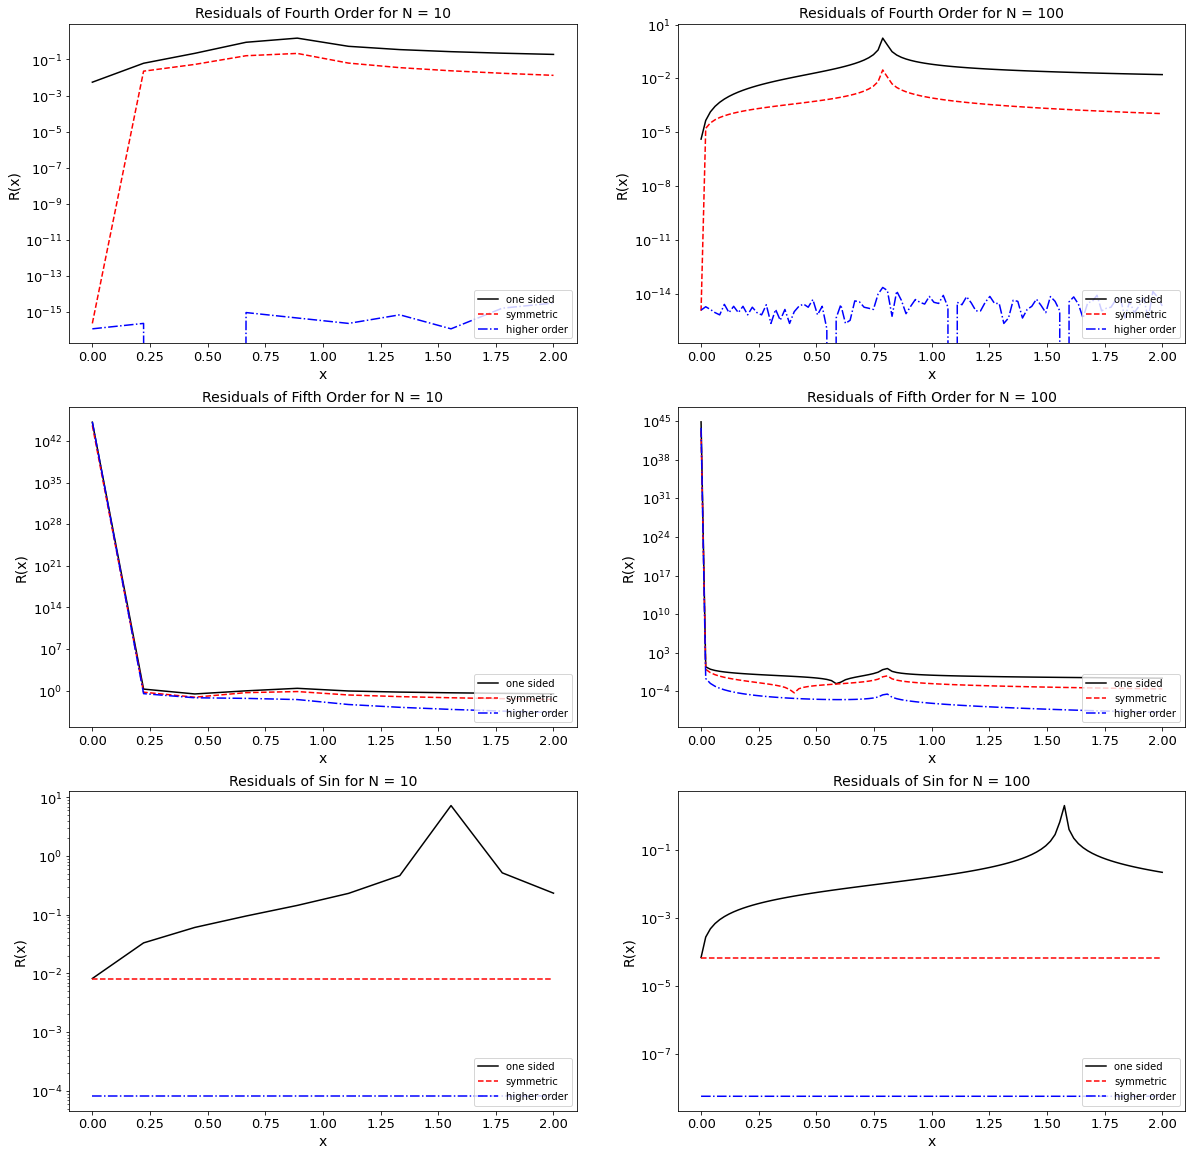

In [19]:
def calculate_resid(func, N, i):
    #Change the flag for test function
    #Number of evaluations
    a = 0 #beginning of eval region
    b= 2 #end of region

    #padding evaluates function at edges beyond the edges of the N points, so we can calculate N derivatives
    padding = 2 # may need to increase this for higher order derivatives

    h = (b-a)/(N-1) #N-1 appears in denominator is because the points at edges are part of our N points
    print("h = ", h)

    #linear spacing between a -padding*h and b+padding*h
    xarr = np.linspace(a -padding*h, b+padding*h, N+2*padding)

    #a check that actual h is same as given by h = (b-a)/(N-1)
    h = xarr[1] - xarr[0]  #distance between two points
    print("h = ", h)

    onesided=  [oneSidedDeriv(xarr, i, h) for i in range(padding, padding+N)] #array of one sided derivatives

    sym = [symmetricDeriv(xarr, i, h) for i in range(padding, padding+N)] #array of symmetric derivatives

    ho = [hoDeriv(xarr, i, h) for i in range(padding, padding+N)] #array of higher order derivatives

    exact = derivtestfunc(xarr) # the exact derivative


    #plot (with y axis in log residual) of the residuals as a function of x
    #residuals give the fractional error
    i.plot(xarr[padding:padding+N], abs(onesided/exact[padding:padding+N]-1), '-k', label='one sided')  #1 sided; should give largest fractional error
    i.plot(xarr[padding:padding+N], abs(sym/exact[padding:padding+N]-1), '--r', label='symmetric')
    i.plot(xarr[padding:padding+N], abs(ho/exact[padding:padding+N]-1), '-.b', label=r'higher order')
    i.set_yscale('log')
    #uncomment this to compare estimated error for one sided derivative
    # second_deriviative of x**4-2*x+1.
    # second_derivative = 12*xarr[padding:padding+N]**2
    # error = h*second_derivative/2 #Taylor expansion estimate for error (h f''/2)
    # plt.semilogy(xarr[padding:padding+N], abs(error/exact[padding:padding+N]), label="one sided error")
    # plt.ylim(1e-20,10)

    i.legend(loc="lower right")
    i.set_xlabel('x', fontsize = 14)
    i.set_ylabel('R(x)', fontsize = 14)

fig, ax = plt.subplots(3,2, figsize = (20, 20))
plt.tick_params(labelsize = 14)

ax = ax.flatten()
N = [10, 100]
a = 0
funcs = ['Fourth Order', 'Fifth Order', 'Sin']
for i in range(3):
    for n in N: 
        func = i + 1
        calculate_resid(i, n, ax[a])
        ax[a].set_title(f'Residuals of {funcs[i]} for N = {n}', fontsize = 14)
        ax[a].tick_params(labelsize = 13)
        a += 1

The error for the one sided derivative evaluation to leading order decreases linearly as h decreases. The error for the symmetric evaluation to leading order is proportional to $h^{2}$. The value of the error for the one sided derivative evaluation is between $10^{-2}$ and $0$ for N = 10 but the error is between $10^{-5}$ and $0$ for the N = 100 case. This is only a slight improvement when compared to the symmetric case. The improvement is much more evident. Qualitatively the error look to have moved down by about $10^{-2}$ when N is changed from 10 to 100. Lastly the higher order derviative evaluation is nearly at machine prescision for both the N = 10 and then N = 100 cases. 

*Need to ask in office hours why we need to look at the sin or quartic polynomials for it to be evident why O(h^4) is so much better*

*Also Need to comment all of this stuff*

## Question 3
#### A)

The force of gravitation is given by 
$$
F = \frac{G M_1 M_2}{r^2}
$$
For a sheet of mass $M_1$ we take the mass to be evenly distributed and the mass per unit area to be $\sigma$ so that
$$
M_1 = \sigma A = \iint \sigma \,dx \,dy
$$
The distance to a point above the middle of the sheet is given be $ r = (x^2 + y^2 + z^2)^\frac{1}{2}$. Finally we are only interested in the z component of force since components in both x and y directions cancels out. Therefore we multiply the force calculated by $\cos{\theta}$ Or equivalently $\frac{z}{(x^2 + y^2 + z^2)^\frac{1}{2}}$
Finall the total force in the Z direction is given by the integral
$$
F_z = GM_1\sigma z \iint \frac{\,dx\,dy}{(x^2 + y^2 + z^2)^{3/2}}
$$

the function used to calculate the double integral will be `scipy.special.roots_legendre` which returns the sample points and weights of the for Gaussian Quadrature. 

In [20]:
from scipy.special import roots_legendre

Text(0, 0.5, 'Force')

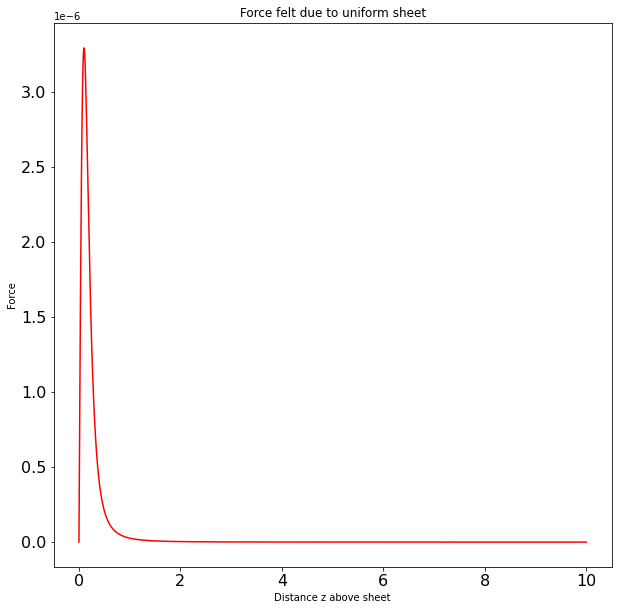

In [54]:
# Define integration constants
G = 6.674e-11
sigma = 10000 / 20 # 10 tonnes divided by 20 m^2 

# Define the integrand
def integrand(x, y, z):
    return 1 / (x**2 + y**2 + z**2)**3/2

# Number of sample points
N = 1000
a = -10
b = 10

# Calculate the sample points adn weights and map them to the required integration domain
x, w = roots_legendre(100)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# For  every value of z, calculate the integral and the force
z = np.linspace(0, 10, 1000)
force = []
for i in z: # for every value of z
    s = 0
    for j in range(100): # calculate the value of the integral by summing over x and y samples
        for k in range(100):
            s += wp[j]*wp[k]*integrand(xp[j], xp[k], i)
    fz = G*sigma*i*s
    force.append(fz)
            

#Plot the force as a function of distance from z = 0 to z = 10
fig, ax = plt.subplots(1,1, figsize = (10,10))
plt.tick_params(labelsize = 16)

ax.plot(z, force, color = 'r')
ax.set_title("Force felt due to uniform sheet")
ax.set_xlabel("Distance z above sheet")
ax.set_ylabel("Force")

* Questions for office hours? 
* Do I need to re-evaluate the gaussian quadrature at every step of z? Otherwise, how do I define the integrand?*

* The method I employ requires 3 nested for loops. Is there a better implementation so that the value of the integrand at every point can be calculated once and used as a function of Z? 

* The method I tried to implement followed nearly exactly that in the book from equation 5.82 and example 5.2. It still takes several seconds to run. I'd like to only need to evaluate the integrand a single time. Is there a way to do this? 

The artifact at small Z is a result of usign Gaussian Quadrature to calculate the integral. Using 

In [53]:
print(z[0:15], force[0:15])

[0.         0.01001001 0.02002002 0.03003003 0.04004004 0.05005005
 0.06006006 0.07007007 0.08008008 0.09009009 0.1001001  0.11011011
 0.12012012 0.13013013 0.14014014] [0.0, 5.670336910951652e-07, 1.1137483528067183e-06, 1.6214429317324076e-06, 2.074430056347466e-06, 2.4610333933184316e-06, 2.7740895857868962e-06, 3.010947885924626e-06, 3.173039750539382e-06, 3.265142993999128e-06, 3.2944846871496445e-06, 3.2698173328209335e-06, 3.2005734109761333e-06, 3.0961653936910944e-06, 2.9654613530643518e-06]


In [55]:
np.argmax(force)

10